In [84]:
import pandas as pd

data_path = "../Labb_Linear_regression/"

data = pd.read_csv(data_path+"Small-diameter-flow.csv", index_col=0)
data.head()

,Flow,Kinematic,Geometric,Inertial,Observer
0,-17.047687,-0.584344,-6.896327,-14.323560,0.0
1,-17.043179,-0.584344,-6.896327,-14.323560,0.0
2,-17.043179,-0.584344,-6.896327,-14.323560,0.0
3,-11.182193,1.242506,-5.069476,-11.583284,0.0
4,-11.184430,1.242506,-5.069476,-11.583284,0.0


In [85]:
import numpy as np

# Y is a responce variable
Y = flow = data['Flow']

# Modellspecifikationsmatrisen (designmatrisen) behöver en 1:a i första kolumnen 

X = np.column_stack([np.ones(Y.shape[0]), data[['Kinematic', 'Geometric','Inertial', 'Observer']]])

X

array([[  1.        ,  -0.58434432,  -6.89632658, -14.32356028,
          0.        ],
       [  1.        ,  -0.58434432,  -6.89632658, -14.32356028,
          0.        ],
       [  1.        ,  -0.58434432,  -6.89632658, -14.32356028,
          0.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          0.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          0.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          0.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          1.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          1.        ],
       [  1.        ,   1.24250647,  -5.06947579, -11.5832841 ,
          1.        ],
       [  1.        ,  -0.58434432,  -6.45368247, -14.32356028,
          0.        ],
       [  1.        ,  -0.58434432,  -6.45368247, -14.32356028,
          0.        ],
       [  1.        ,  -0.58434432,  -6.453

In [86]:
# pseudo-invers för prestanda
b = np.linalg.pinv(X.T @ X) @ X.T @ Y
b

array([-2.58376909,  0.87000771,  3.60315069, -0.75188958,  0.0168805 ])

In [87]:
# d - number of features of the model.
d = X.shape[1]-1

# n - size of the sample
n = Y.shape[0]


# A function or method to calculate the variance.
SSE = np.sum(np.square(Y-(X @ b)))
var = SSE/(n-d-1)

# A function or method to calculate the standard deviation.
S = np.sqrt(var)

# Calculate the total variability
Syy = (n*np.sum(np.square(Y)) - np.square(np.sum(Y)))/n

# Calculate the sum of squares due to the regression 
SSR = Syy - SSE
#SSR = (n*np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))))/n

print (d)
print (n)
print (SSE)
print (var)
print (S)
print (Syy)
print (SSR)

4
198
1.2105524599028366
0.006272292538356666
0.07919780639864128
425.14419302220614
423.9336405623033


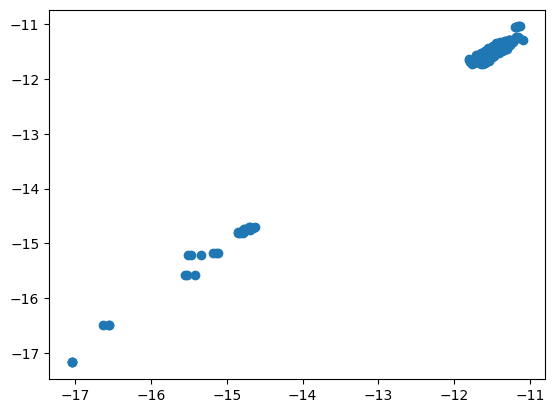

In [88]:
import matplotlib.pyplot as plt

plt.scatter(Y, X @ b)

In [89]:
Rsq = SSR/Syy

Rsq

# Chose 90% as confidense level


np.float64(0.9971526073276518)

In [90]:
import scipy.stats as stats

# H0: all β = 0
sig_statistic = (SSR/d)/S
p_significance = stats.f.sf(sig_statistic, d, n-d-1)

p_significance

# We reject null hypothesis, regresion is significant!

np.float64(1.726518234856186e-139)

In [91]:
c = np.linalg.pinv(X.T@X)*var

#H0: b3 is irrelevant, β3 = 0
b3_statistic = b[3] / (S*np.sqrt(c[3,3]))
p_b3 = 2*min(stats.t.cdf(b3_statistic, n-d-1), stats.t.sf(b3_statistic, n-d-1))

p_b3

np.float64(1.1628066959544189e-241)